In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

from sklearn.cluster import KMeans

%matplotlib inline

In [17]:
df = pd.read_csv('base.csv',sep=';',decimal=',')
df.replace(to_replace=r'properties', value='jpg', regex=True)
df.head()

,name,b1,b2,h1,h2,s1,s2
0,0001BFD8A4B8735B5BEE52282B392820.properties,0.4647965145718742,0.32173970803660196,0.4071637552766217,0.3724891993682404,0.4266859967637939,0.2972669844608622
1,000252148AEA0C1F52DF52067D47A924.properties,0.9728764931169802,0.12490816829303285,0.0,0.0,0.0,0.0
2,00030CA61304CA486165F1FFE701DAF9.properties,0.7369396703187162,0.17361123405382337,0.4680602352237899,0.17366607466548994,0.8686488625720191,0.2167704038402477
3,000502B337F3EECF034B4B202EC0250B.properties,0.47285325451653126,0.32608111665242767,0.49178812803159494,0.22035922135828936,0.3455637393719832,0.21684421103410653
4,000527A374338971ADB8C68E3DD8FBAD.properties,0.8094858788606986,0.3300581238396209,0.19563310138422288,0.34554802361750253,0.10586959330609105,0.24323208638722008


In [18]:
df.describe()

,name,b1,b2,h1,h2,s1,s2
count,96744,96744,96744,96744,96744,96744,96744
unique,96744,89696,89691,73476,73472,73516,73512
top,1143678C38F6ABE5DB5E252ADC416313.properties,1.0,0.0,0.0,0.0,0.0,0.0
freq,1,1997,2012,17782,17788,17782,17787


In [19]:
X = df.iloc[:, 1:].values

In [20]:
X.shape

(96744, 6)

In [ ]:
#sns.pairplot(df)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X[:,0], X[:,1])

In [15]:
#from sklearn.preprocessing import LabelEncoder
#label_enc = LabelEncoder()
#X[:,1] = label_enc.fit_transform(X[:,1])

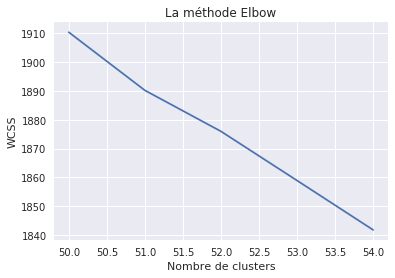

In [21]:
# UMéthode elbow pour trouver le nombre optimal de clusters
wcss = []
mini = 50
maxi = 55
for i in range(mini, maxi):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_jobs = -1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(mini, maxi), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Construction du modèle
k = 55
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0, n_jobs = -1)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[38  1 31 ... 41 44 34]


In [23]:
df['cat'] = y_kmeans

In [24]:
df.head()

,name,b1,b2,h1,h2,s1,s2,cat
0,0001BFD8A4B8735B5BEE52282B392820.properties,0.4647965145718742,0.32173970803660196,0.4071637552766217,0.3724891993682404,0.4266859967637939,0.2972669844608622,38
1,000252148AEA0C1F52DF52067D47A924.properties,0.9728764931169802,0.12490816829303285,0.0,0.0,0.0,0.0,1
2,00030CA61304CA486165F1FFE701DAF9.properties,0.7369396703187162,0.17361123405382337,0.4680602352237899,0.17366607466548994,0.8686488625720191,0.2167704038402477,31
3,000502B337F3EECF034B4B202EC0250B.properties,0.47285325451653126,0.32608111665242767,0.49178812803159494,0.22035922135828936,0.3455637393719832,0.21684421103410653,20
4,000527A374338971ADB8C68E3DD8FBAD.properties,0.8094858788606986,0.3300581238396209,0.19563310138422288,0.34554802361750253,0.10586959330609105,0.24323208638722008,33


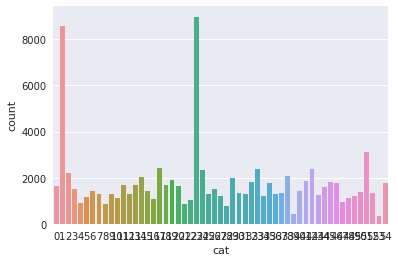

In [25]:
sns.countplot(x='cat',data=df)

In [32]:
df.groupby('cat').count()

,name,b1,b2,h1,h2,s1,s2
cat,,,,,,,
0,1636,1636,1636,1636,1636,1636,1636
1,8565,8565,8565,8565,8565,8565,8565
2,2185,2185,2185,2185,2185,2185,2185
3,1519,1519,1519,1519,1519,1519,1519
4,892,892,892,892,892,892,892
5,1151,1151,1151,1151,1151,1151,1151
6,1414,1414,1414,1414,1414,1414,1414
7,1308,1308,1308,1308,1308,1308,1308
8,860,860,860,860,860,860,860


In [34]:
df[df.cat==51].name

6        00056E5CBBB70B82CDF2DECA54223AE2.properties
19       000D614C16734B5EDFBFE4C1035E7E33.properties
47       00268CFE3901E9E86784E5CAC9130284.properties
56       002BCD541154831ED4EDC8661D4A1D26.properties
57       002C49AAFD4E171C526863BB1D4D9ECC.properties
88       0040A729C9938EFCB14CC9FA8237917F.properties
149      006891F95120F4627A8F9E58C7E9DC6A.properties
195      0089014F9334856B2AF5E662B50572F3.properties
213      0092E7F9BDEC6D05D9D79A4074AE9098.properties
281      00BE73E210F3B33AFBDD1B37320D0233.properties
294      00CD804FEE4CA227B4A613B3BA777A7C.properties
377      01073CAD200702742D18733261394E6D.properties
420      0124C7A0AF108F21585B1C652A444448.properties
475      014C0498176288DCCB95AAE1F2628A7D.properties
496      015A853CBA3F01407E88B7B57B6F05D8.properties
531      0179E6584E1D52E62B4DED70B510AE0C.properties
562      018EE79593B1AF75698206C2F05024B7.properties
569      0194EF8FC3156E0F97E919D809F8FCCC.properties
661      01DB83ED871D2D8CA5E2FEEB15E09851.prop